Lets start by dividing the task into some components that are necessary to implement:

1. Data Preprocessing 
2. Text-Based Product Recommendation
3. Image-Based Product Recommendation
4. Integration - Combine recommendation systems and get a list of final recommendations
5. Evaluation - Fine tunning the parameters

In [2]:
import pandas as pd
from urllib.request import urlopen
from PIL import Image
from io import BytesIO
import os
import requests

# Load the dataset
dataset = pd.read_csv('28k_apparel_data.csv')


dataset.info()

# Display the first few rows of the dataframe
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17593 entries, 0 to 17592
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         17593 non-null  int64 
 1   asin               17593 non-null  object
 2   brand              17543 non-null  object
 3   color              17593 non-null  object
 4   medium_image_url   17593 non-null  object
 5   product_type_name  17593 non-null  object
 6   title              17593 non-null  object
 7   formatted_price    17593 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


,Unnamed: 0,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
1,6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
2,15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
3,27,B014ICEJ1Q,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel O Nec...,$7.39
4,43,B0079BMKDS,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,APPAREL,Featherlite Ladies' Silky Smooth Pique (White)...,$13.53


In [3]:
def preprocessing(dataset):
    # Check for missing values
    null_values = dataset.isnull().sum().sort_values(ascending=False)
    null_values = pd.DataFrame(data=null_values, columns=['Null Values'])
    missing_values = null_values[null_values['Null Values'] > 0]
    print(missing_values)

    dataset['brand'].fillna(dataset['brand'].mode()[0], inplace=True)

    null_values_after_fill = dataset.isnull().sum().sort_values(ascending=False)
    missing_values_after_fill = null_values_after_fill[null_values_after_fill > 0]
    if len(missing_values_after_fill) == 0:
        print("All missing values filled successfully.")
    else:
        print("Some missing values could not be filled.")

    return dataset 


dataset = preprocessing(dataset)

       Null Values
brand           50
All missing values filled successfully.


In [4]:
image_directory = 'images/'
os.makedirs(image_directory, exist_ok=True)

def download_and_save_image(url, filename):

    if os.path.exists(image_directory):
        print(f"Image already exists. Skipping downloads")
        return
    
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, 'wb') as f:
                f.write(response.content)
                print(f"Image saved: {filename}")
        else:
            print(f"Failed to download image from {url}. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error downloading image from {url}: {e}")

# Iterate over the dataset and download images
for index, row in dataset.iterrows():
    image_url = row['medium_image_url']
    image_name = f"{row['asin']}.jpg"
    image_path = os.path.join(image_directory, image_name)
    download_and_save_image(image_url, image_path)

Image already exists. Skipping downloads


Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already exists. Skipping downloads
Image already e

Text-Based Recommendation:

Text Preprocessing: Tokenize the text data and remove stopwords.

In [5]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Remove stopwords and tokenize text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]  # Remove stopwords and non-alphanumeric tokens
    return " ".join(filtered_tokens)

# Apply text preprocessing
dataset['title'] = dataset['title'].apply(preprocess_text)
dataset['product_type_name'] = dataset['product_type_name'].apply(preprocess_text)

# Display the preprocessed text
print(dataset[['title', 'product_type_name']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\petni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\petni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               title product_type_name
0  featherlite ladies long sleeve stain resistant...             shirt
1  women unique 100 cotton special olympics world...             shirt
2  featherlite ladies moisture free mesh sport sh...             shirt
3  supernatural chibis sam dean castiel neck fema...             shirt
4     featherlite ladies silky smooth pique white xl           apparel


In [ ]:
# Drop unnecessary columns
dataset = dataset.drop(columns=['Unnamed: 0', 'asin', 'color', 'medium_image_url', 'formatted_price'])

# Display the modified dataframe
print(dataset.head())

                         brand product_type_name  \
0                  FeatherLite             shirt   
1  HX-Kingdom Fashion T-shirts             shirt   
2                  FeatherLite             shirt   
3                        FNC7C             shirt   
4                  FeatherLite           apparel   

                                               title  
0  featherlite ladies long sleeve stain resistant...  
1  women unique 100 cotton special olympics world...  
2  featherlite ladies moisture free mesh sport sh...  
3  supernatural chibis sam dean castiel neck fema...  
4     featherlite ladies silky smooth pique white xl  


In [ ]:
pd.set_option('display.max_colwidth', None)

dataset

,brand,product_type_name,title
0,FeatherLite,shirt,featherlite ladies long sleeve stain resistant tapered twill shirt 2xl onyx stone
1,HX-Kingdom Fashion T-shirts,shirt,women unique 100 cotton special olympics world games 2015 white size l
2,FeatherLite,shirt,featherlite ladies moisture free mesh sport shirt white
3,FNC7C,shirt,supernatural chibis sam dean castiel neck female purple l
4,FeatherLite,apparel,featherlite ladies silky smooth pique white xl
...,...,...,...
17588,YueLian,shirt,yuelian women chiffon short sleeves sun protection outerwear blouse
17589,Vintage America,shirt,vintage america women large lace collared blouse white l
17590,Tart Collections,shirt,tart womens collections ann wrap top xs black
17591,Soprano,shirt,soprano womens small tank top gray


Bag of Words (BoW)

Bag of Words (BoW) is a way of representing text data in numerical form, where each word in a text document is treated as a separate feature

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Function to create Bag of Words (BoW) representation of product types
def create_bow(product_type):
    bow = {}
    for pt in product_type.split('/'):
        bow[pt.strip()] = 1
    return bow

# Create BoW representations for product types
bags_of_words = [create_bow(pt) for pt in dataset['product_type_name']]

# Create DataFrame to store BoW representations
bow_df = pd.DataFrame(bags_of_words, index=dataset['title']).fillna(0)

# Calculate cosine similarity matrix between products
cosine_similarity_matrix = cosine_similarity(bow_df)

# Create DataFrame with cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity_matrix, index=bow_df.index, columns=bow_df.index)

# Ask the user for a product they like
product = input('Enter a product you like: ')

# Find the index of the product in the similarity DataFrame
product_index = similarity_df.index.get_loc(product)

# Get the top 10 most similar products to the input product
top_10 = similarity_df.iloc[product_index].sort_values(ascending=False)[1:11]

# Print the top 10 most similar products to the input product
print(f'Top 10 similar products to {product}:')
print(top_10)

Top 10 similar products to featherlite ladies long sleeve stain resistant tapered twill shirt 2xl onyx stone:
title
kona dot womens sz xxl                                              1.0
women knit top tipi tent print tee cotton white xs                  1.0
hurley womens moonrise singlet tank top gtk0004250 grey heather     1.0
bundle lightweight dri fit sporty top htc garment guide carolina    1.0
socialite teal women medium lace cutout blouse blue                 1.0
j brand womens pinstripe shirt xs blue                              1.0
material girl juniors active knit top medium black                  1.0
violeta mango women plus size strap top navy xs                     1.0
recycled karma womens medium knit tank top black                    1.0
harve benard women small plaid printed blouse black                 1.0
Name: featherlite ladies long sleeve stain resistant tapered twill shirt 2xl onyx stone, dtype: float64


In [ ]:
#pip install tensorflow
#pip install keras
#pip install scikit-learn


In [1]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
# parameters setup

imgs_path = "images/"
print(len(os.listdir(imgs_path)))
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

17510


In [3]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

number of images: 17510


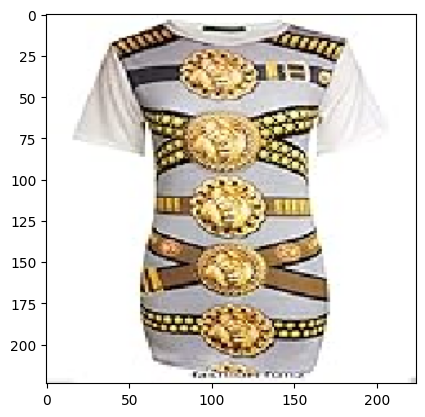

image loaded successfully!


In [5]:
# load an image in PIL format
import matplotlib.pyplot as plt
original = load_img(files[1], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [6]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [7]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

1/1 [==============================] - 1s 1s/step
features successfully extracted!
number of image features: 4096


array([[0.       , 6.661484 , 0.       , ..., 0.       , 4.1963696,
        0.       ]], dtype=float32)

In [8]:
importedImages = []

# Iterate over the first 3000 files in files
for f in files[:500]:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())


In [9]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

16/16 [==============================] - 89s 6s/step
features successfully extracted!


(500, 4096)

In [10]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files[:500], index=files[:500])
cos_similarities_df.head()

,images/0000000060.jpg,images/6042589113.jpg,images/6342521018.jpg,images/B00029I0Z6.jpg,images/B0006LTFTK.jpg,images/B0007SMV9I.jpg,images/B0009MDHAE.jpg,images/B0009W2GHE.jpg,images/B000BTBPWW.jpg,images/B000BTDK6G.jpg,...,images/B007ZV5S3Q.jpg,images/B008064F0W.jpg,images/B0080DDN6M.jpg,images/B0080DDNL2.jpg,images/B0080DDUGK.jpg,images/B0080NOSAC.jpg,images/B00824GA5U.jpg,images/B00846GJSO.jpg,images/B0084X7Q0M.jpg,images/B0085CB1JE.jpg
images/0000000060.jpg,1.000000,0.275240,0.278503,0.184158,0.142794,0.352938,0.200657,0.283625,0.166363,0.252010,...,0.311945,0.232903,0.372825,0.366542,0.417067,0.247488,0.270768,0.304357,0.283064,0.256849
images/6042589113.jpg,0.275240,1.000000,0.546252,0.348338,0.314773,0.439921,0.357437,0.484141,0.284904,0.410613,...,0.316814,0.406690,0.293209,0.257807,0.331372,0.423755,0.476071,0.387920,0.553505,0.473465
images/6342521018.jpg,0.278503,0.546252,1.000000,0.327593,0.430085,0.507322,0.436605,0.463970,0.351640,0.527397,...,0.394452,0.437178,0.188332,0.245446,0.322368,0.495456,0.638880,0.359043,0.600168,0.454450
images/B00029I0Z6.jpg,0.184158,0.348338,0.327593,1.000000,0.378100,0.292290,0.458327,0.309660,0.436663,0.315678,...,0.358518,0.389264,0.238911,0.176392,0.179209,0.321766,0.322299,0.357192,0.340781,0.349372
images/B0006LTFTK.jpg,0.142794,0.314773,0.430085,0.378100,1.000000,0.345607,0.446274,0.327778,0.471452,0.373620,...,0.346893,0.653024,0.166157,0.230202,0.177293,0.493809,0.418249,0.219218,0.315580,0.412808


In [11]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


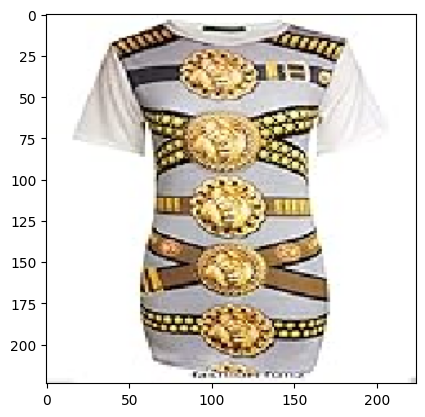

-----------------------------------------------------------------------
most similar products:


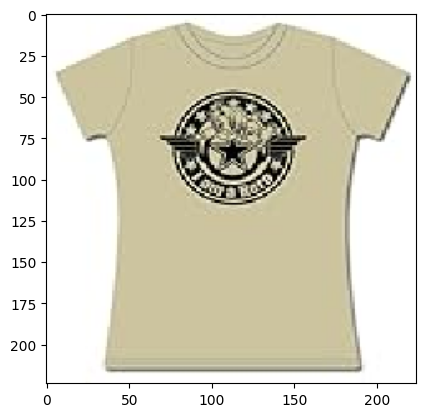

similarity score :  0.64738095


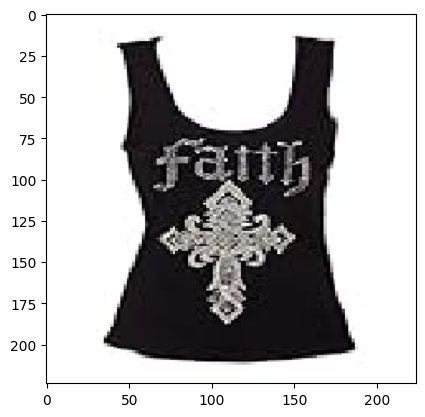

similarity score :  0.6465432


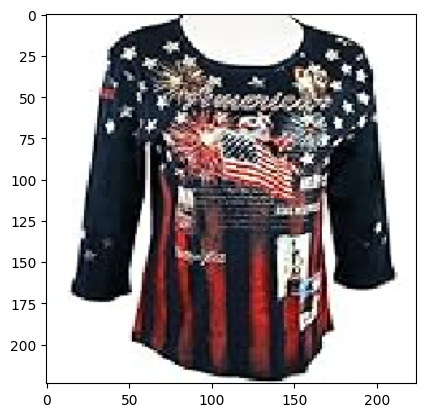

similarity score :  0.63858455


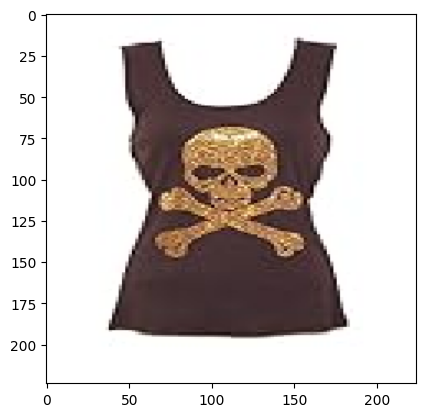

similarity score :  0.6333469


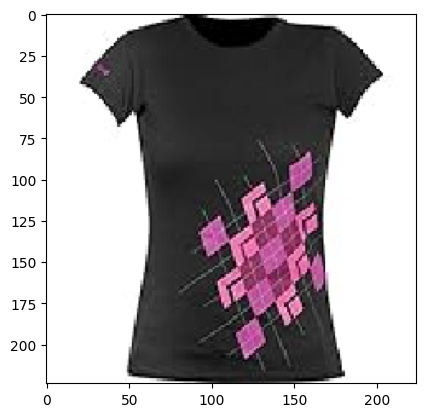

similarity score :  0.62046397


In [12]:
retrieve_most_similar_products(files[1])
